In [1]:
from langchain_openai import ChatOpenAI
import base64
import os
from typing import List
from extract_frames import extract_frames
from gtts import gTTS


llm = ChatOpenAI(
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    api_key="API-KEY",
)

print(llm.invoke("Good mo"))

content='rning! How can I assist you today?' response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-6b2974b3-5db8-4abb-a57a-a9e79df0e51b-0' usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19}


In [5]:
def load_image(inputs: dict) -> dict:
    """Load image from file and encode it as base64."""
    image_path = inputs["image_path"]

    def encode_image(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')
    image_base64 = encode_image(image_path)
    return {"image": image_base64}

from langchain.chains import TransformChain
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain import globals
from langchain_core.runnables import chain

load_image_chain = TransformChain(
    input_variables=["image_path"],
    output_variables=["image"],
    transform=load_image
)

# Set verbose
globals.set_debug(True)

@chain
def image_model(inputs: dict) -> str:
    model = ChatOpenAI(temperature=0.5, max_tokens=1024, model="gpt-4o", api_key="API-KEY")
    msg = model.invoke(
        [HumanMessage(
            content=[
                {"type": "text", "text": inputs["prompt"]},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{inputs['image']}"}},
            ])]
    )
    return msg.content if msg else ""

def get_image_information(image_path: str) -> str:
    vision_prompt = "Describe the image you see.limit to 15 words, cannot exceed! Reading the description should be limited to 5 seconds"
    vision_chain = load_image_chain | image_model 
    response = vision_chain.invoke({'image_path': image_path, 'prompt': vision_prompt})
    return response


In [13]:
from moviepy.editor import VideoFileClip

def extract_audio_from_video(video_path, output_audio_path):
    video = VideoFileClip(video_path)
    audio = video.audio
    if audio is None:
        print("No audio track found in the video.")
        return "No audio track found in the video."
    audio.write_audiofile(output_audio_path)

# Example usage
video_path = "birdy.mov"
output_audio_path = "original_audio.mp3"
extract_audio_from_video(video_path, output_audio_path)


import ssl
import certifi
from urllib.request import urlopen

# Set SSL context globally
context = ssl.create_default_context(cafile=certifi.where())
ssl._create_default_https_context = lambda: context

def transcribe_audio(audio_file_path):
    try:
        model = whisper.load_model("base")
        result = model.transcribe(audio_file_path)
        print(result["text"])
        return result["text"]
    except Exception as e:
        print(f"An error occurred during transcription: {e}")
        return f"Error: {e}"

text_transcribed = ""
if extract_audio_from_video(video_path, output_audio_path) != "No audio track found in the video.":
    text_transcribed = transcribe_audio("original_audio.mp3")

No audio track found in the video.
No audio track found in the video.


[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{
  "image_path": "my_frames/timestamp_0.00.jpg",
  "prompt": "Describe the image you see.limit to 15 words, cannot exceed! Reading the description should be limited to 5 seconds"
}
[chain/start] [chain:RunnableSequence > chain:TransformChain] Entering Chain run with input:
{
  "image_path": "my_frames/timestamp_0.00.jpg",
  "prompt": "Describe the image you see.limit to 15 words, cannot exceed! Reading the description should be limited to 5 seconds"
}
[chain/end] [chain:RunnableSequence > chain:TransformChain] s] Exiting Chain run with output:
{
  "image": "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAM4BmADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYG
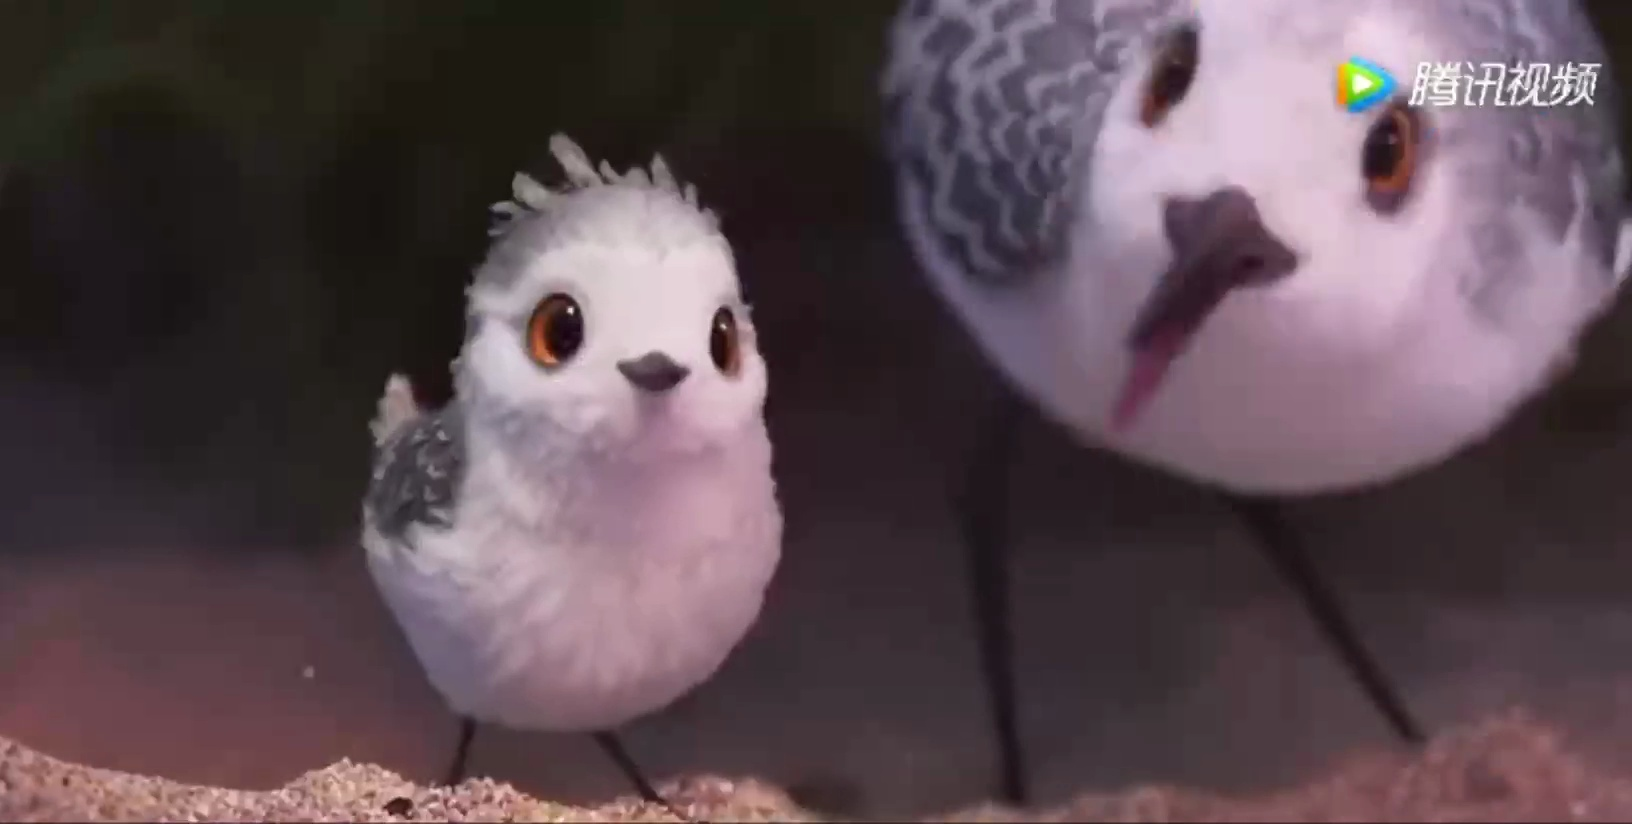
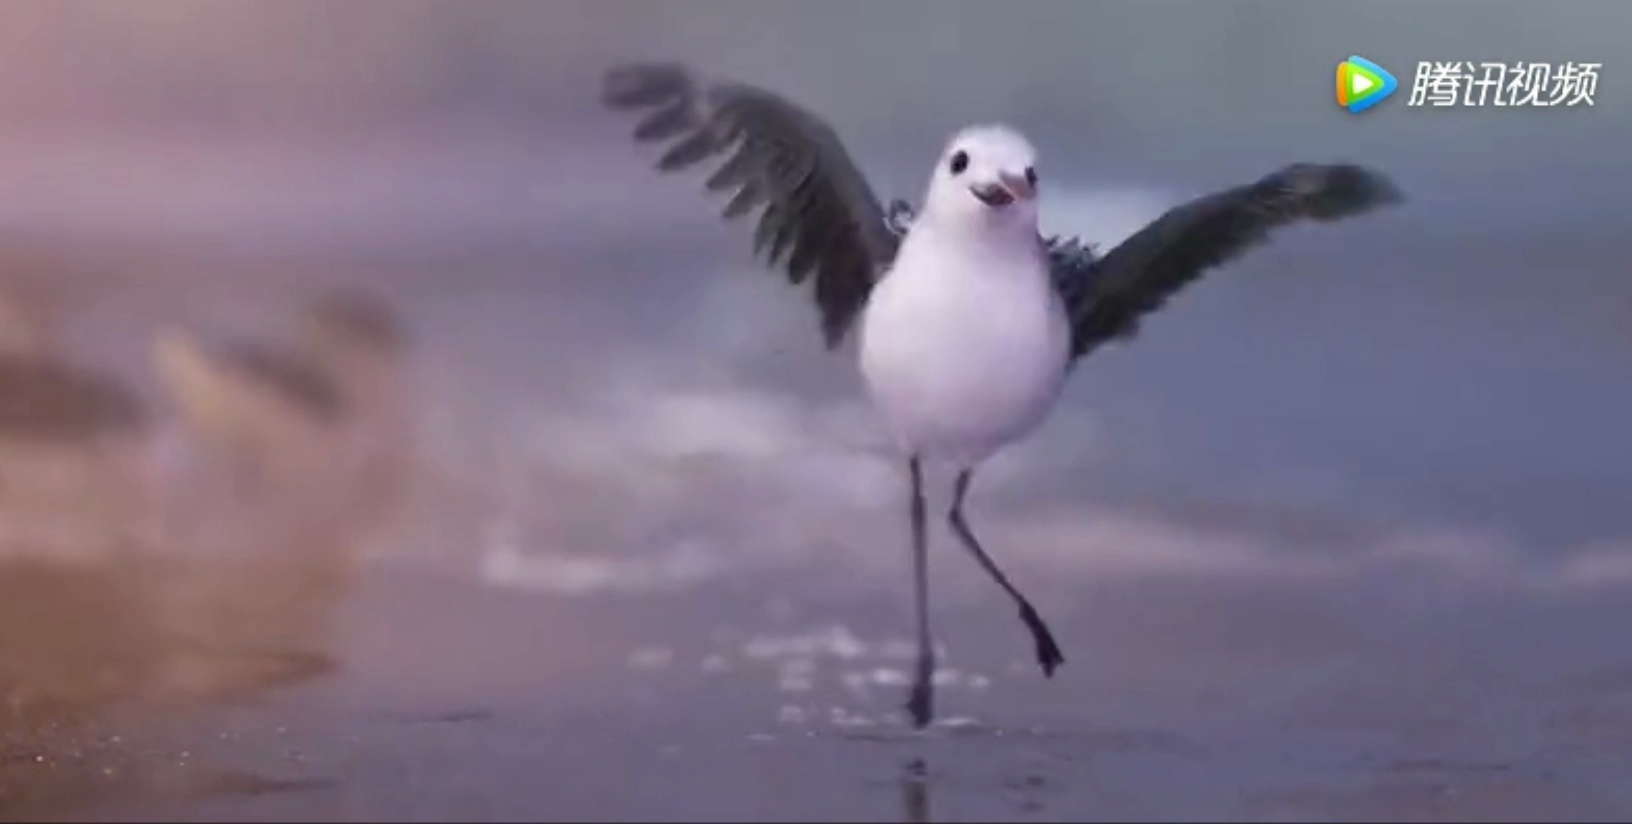
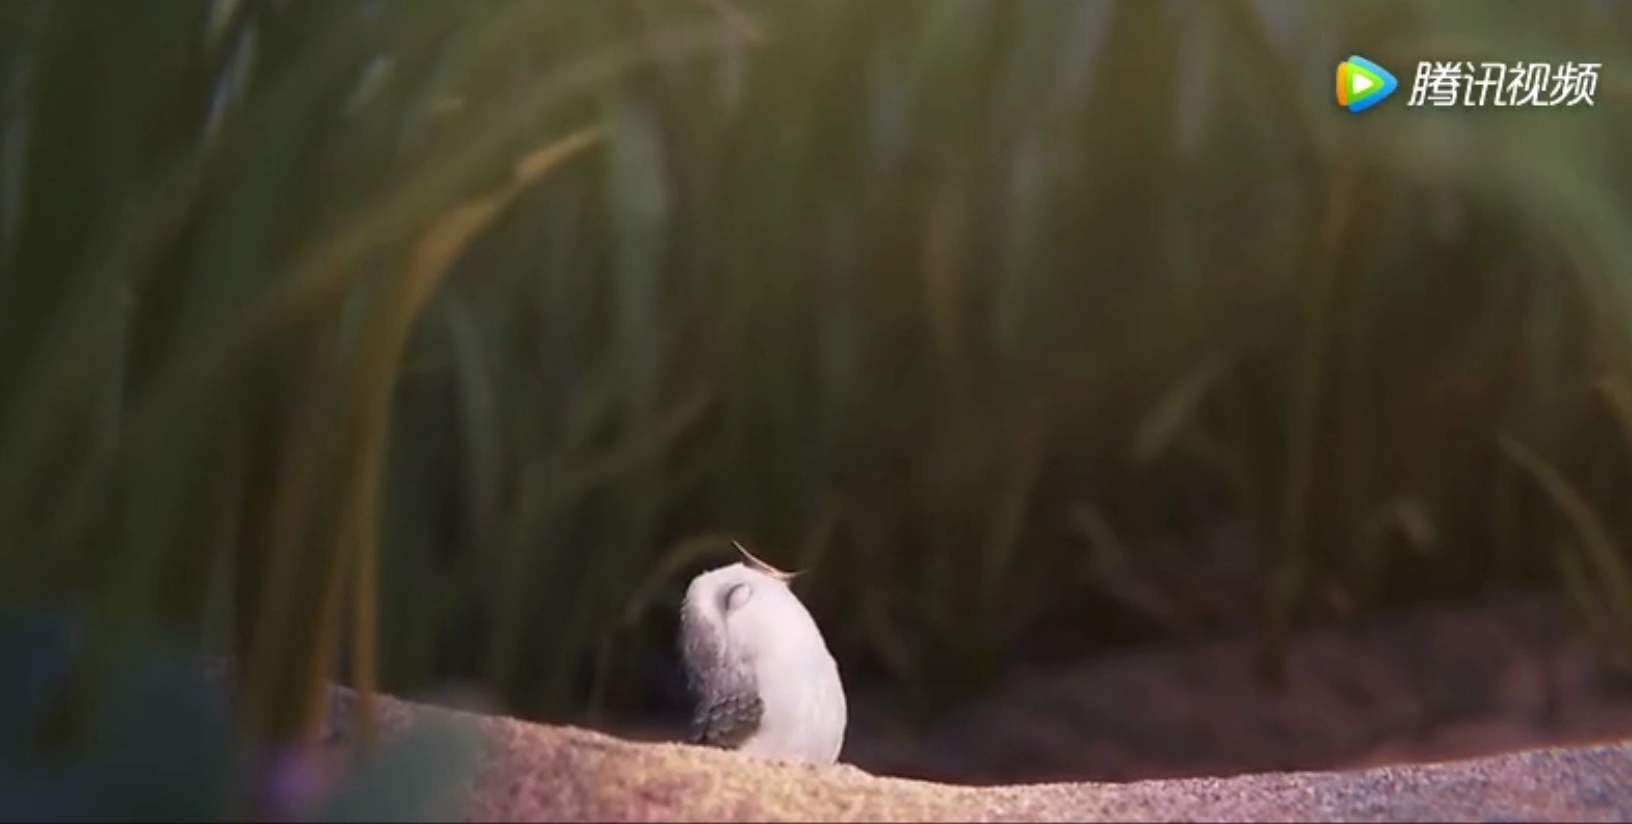
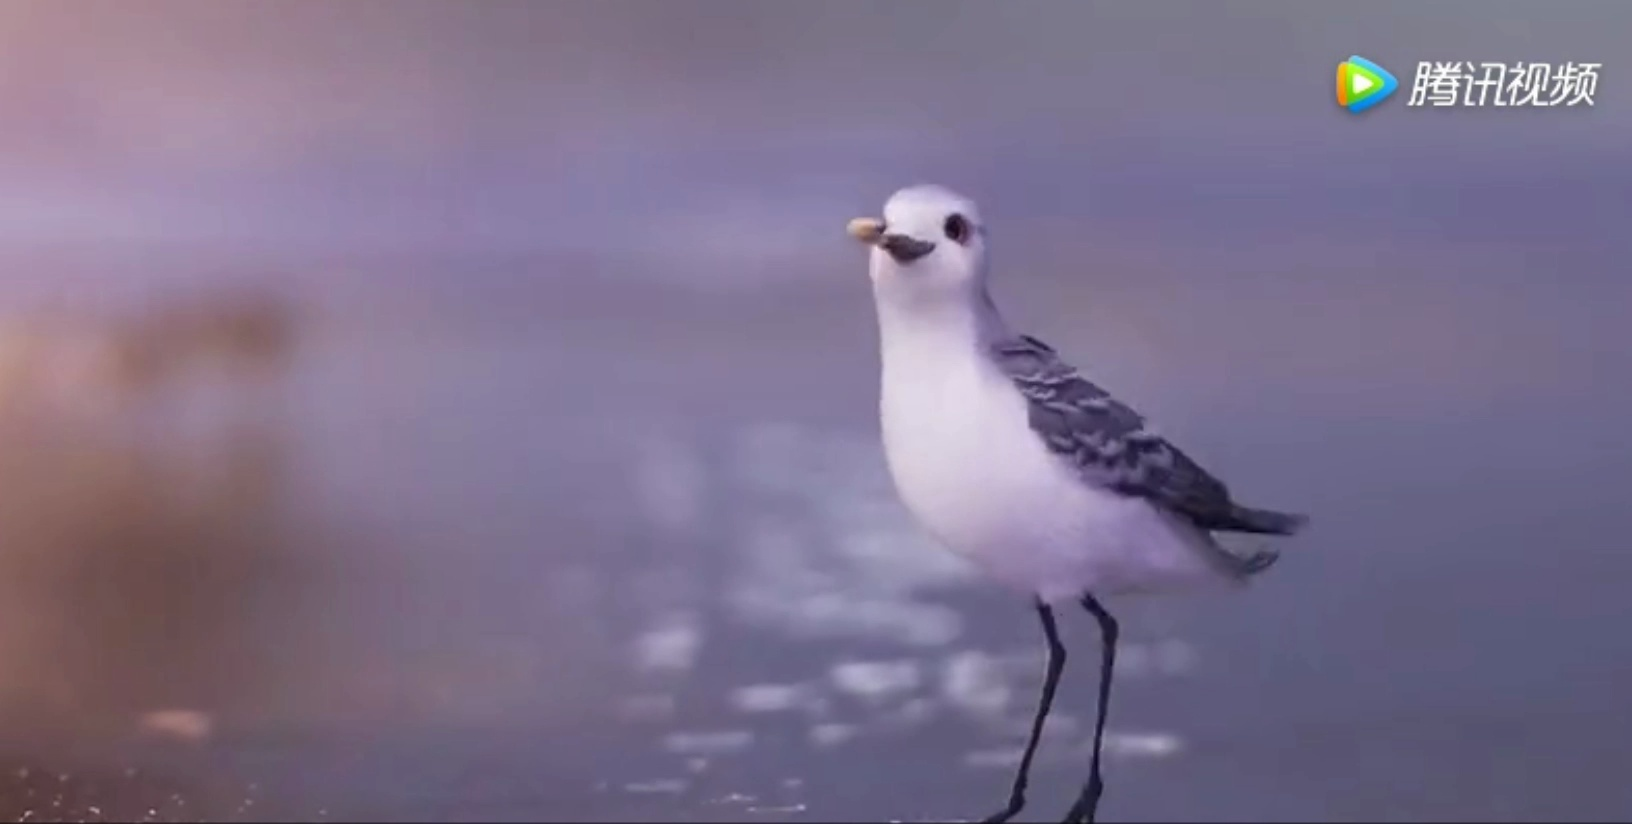
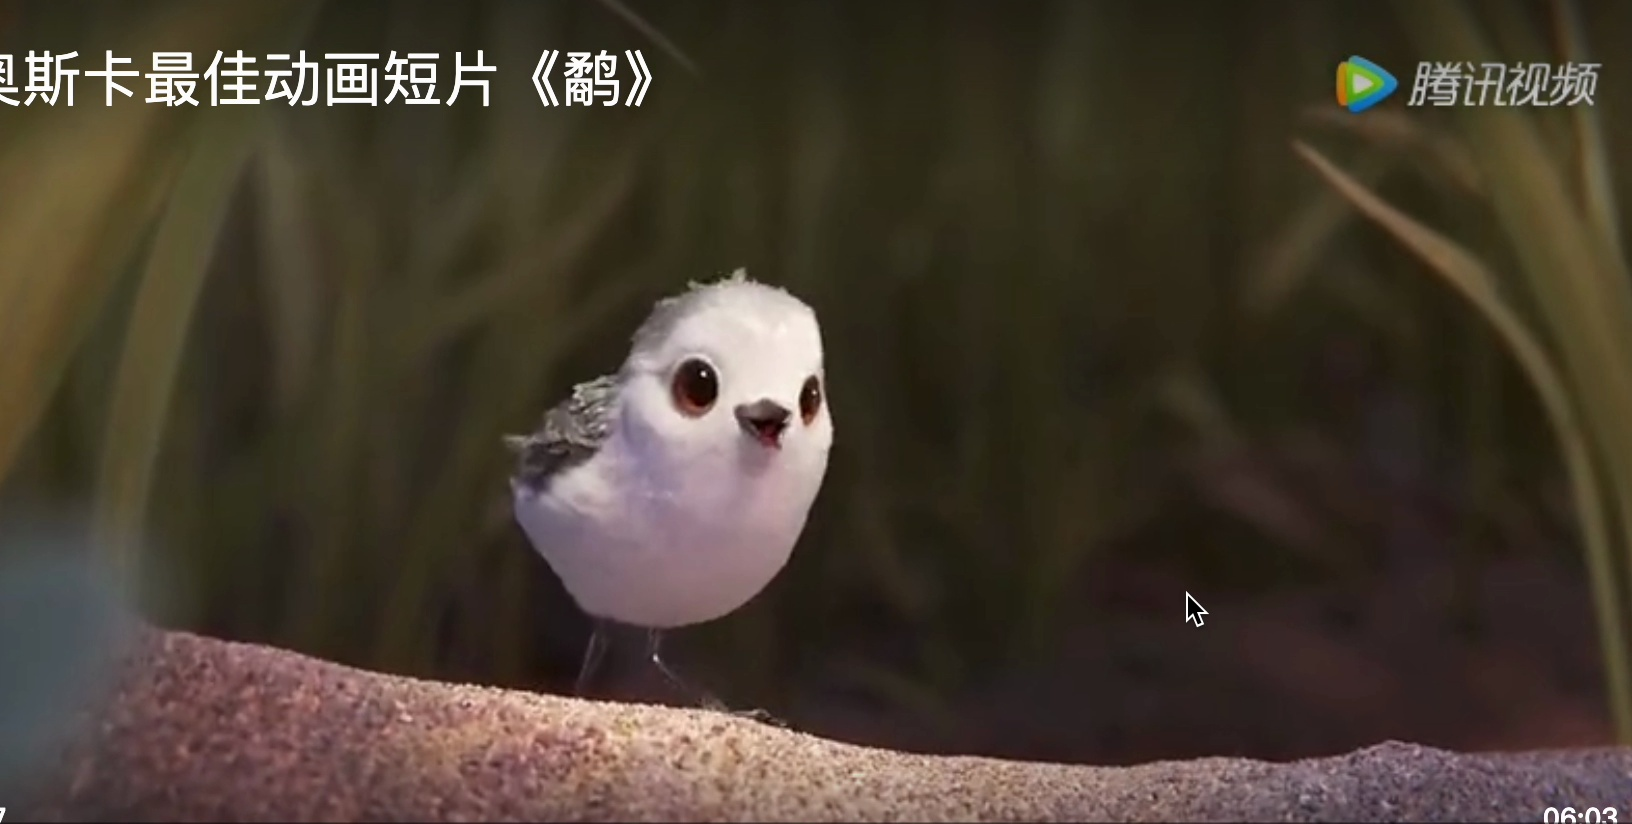
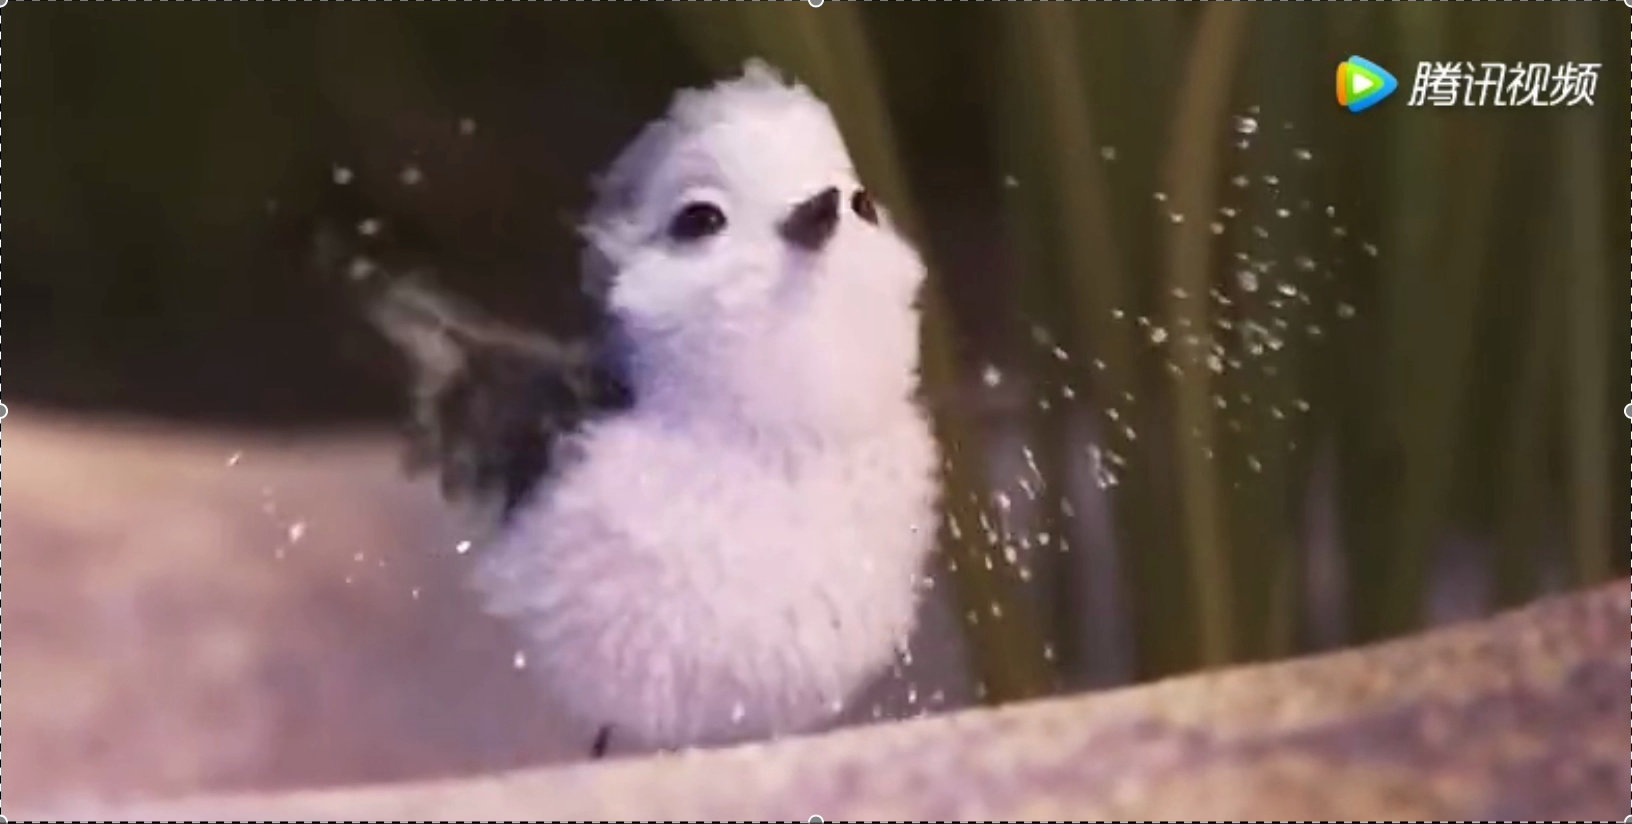
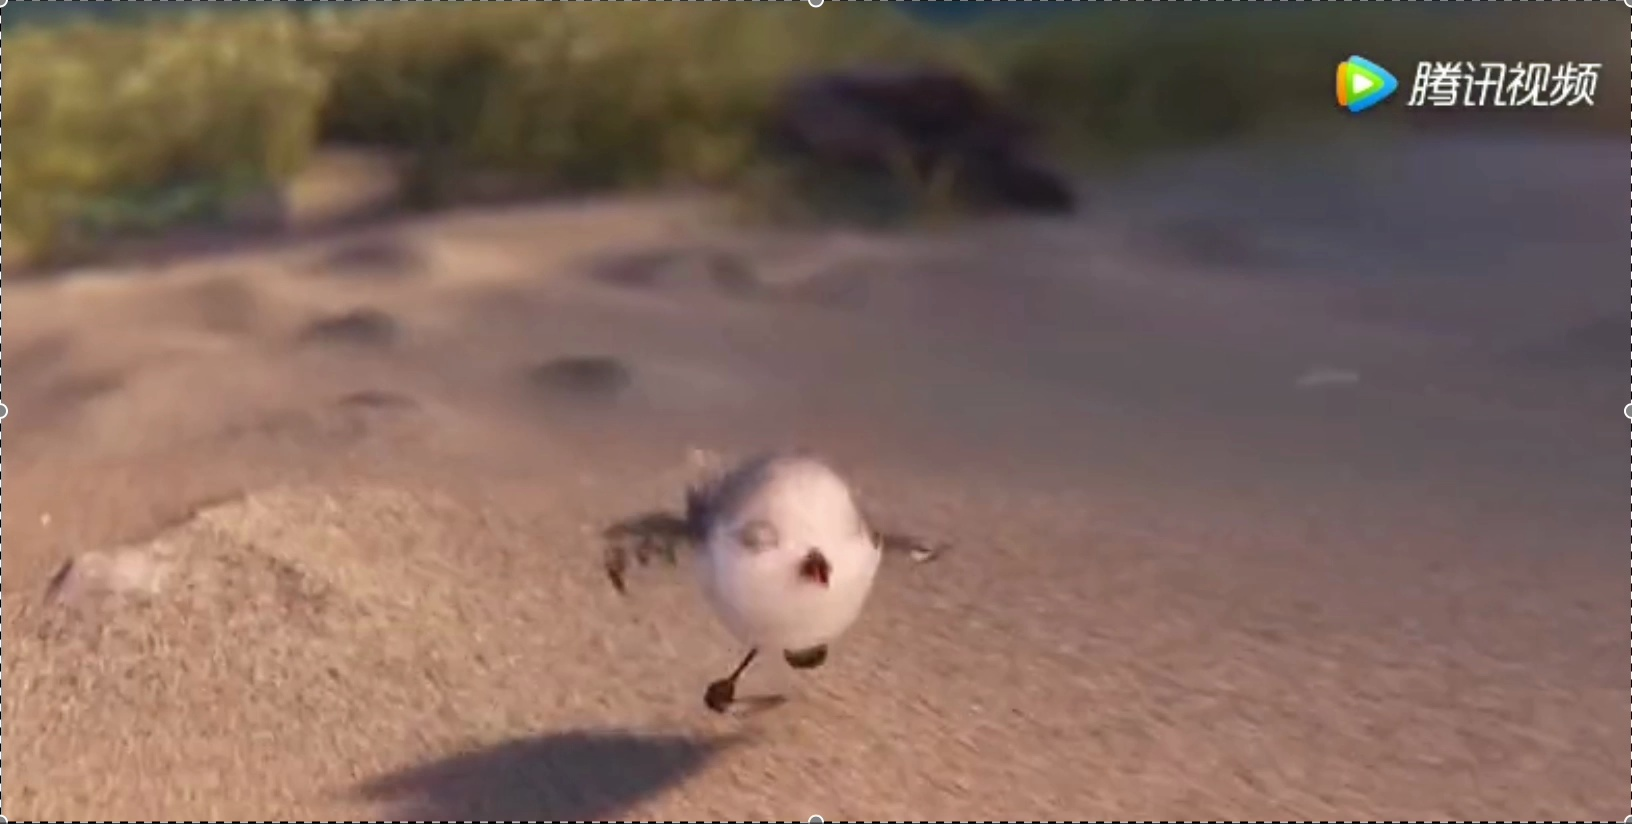
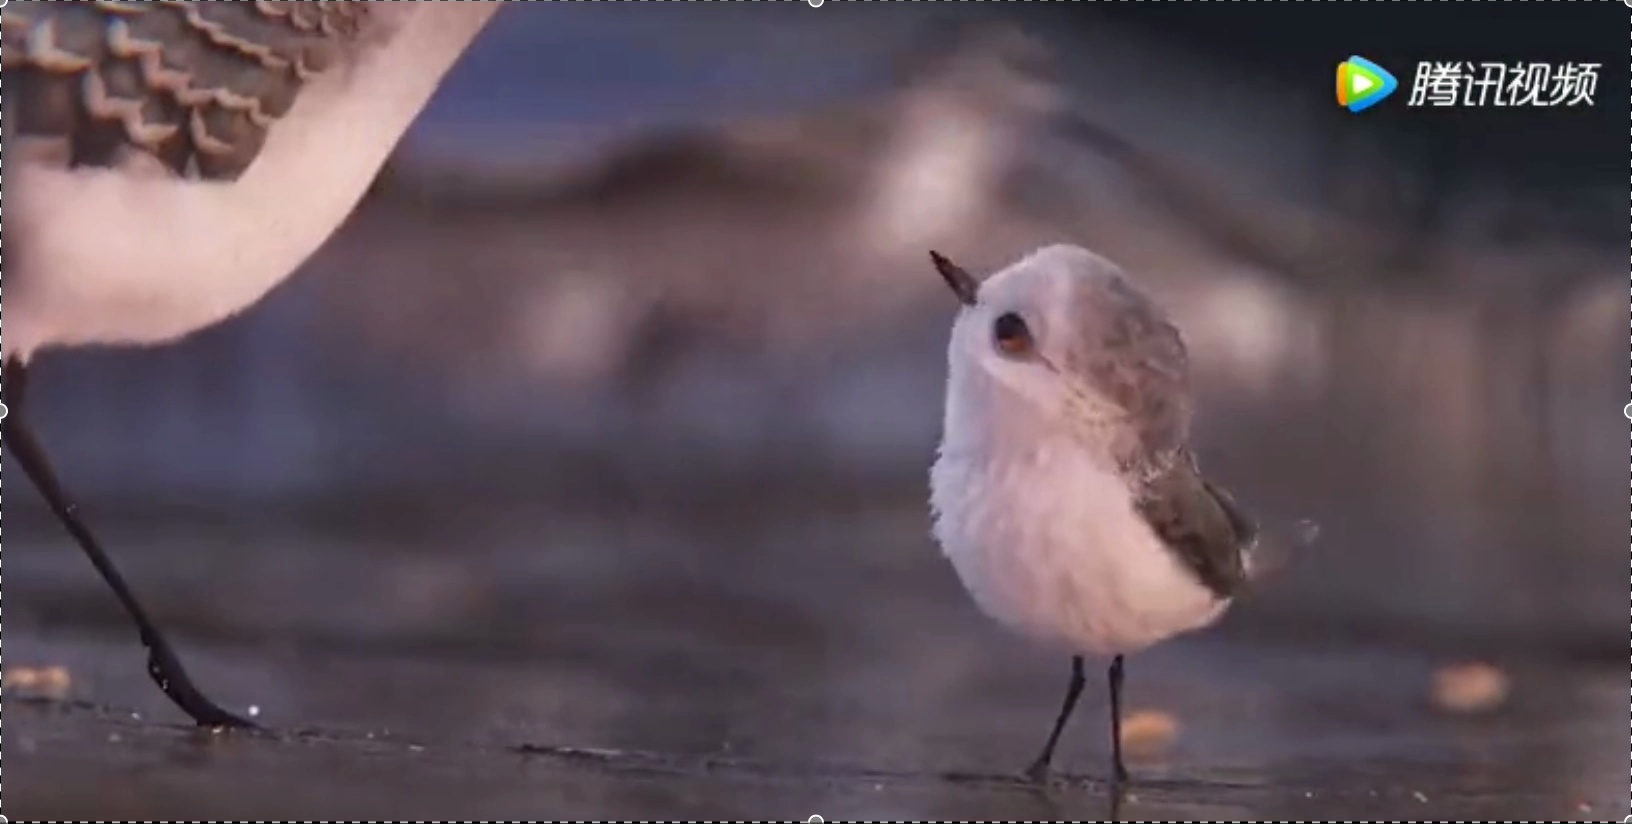
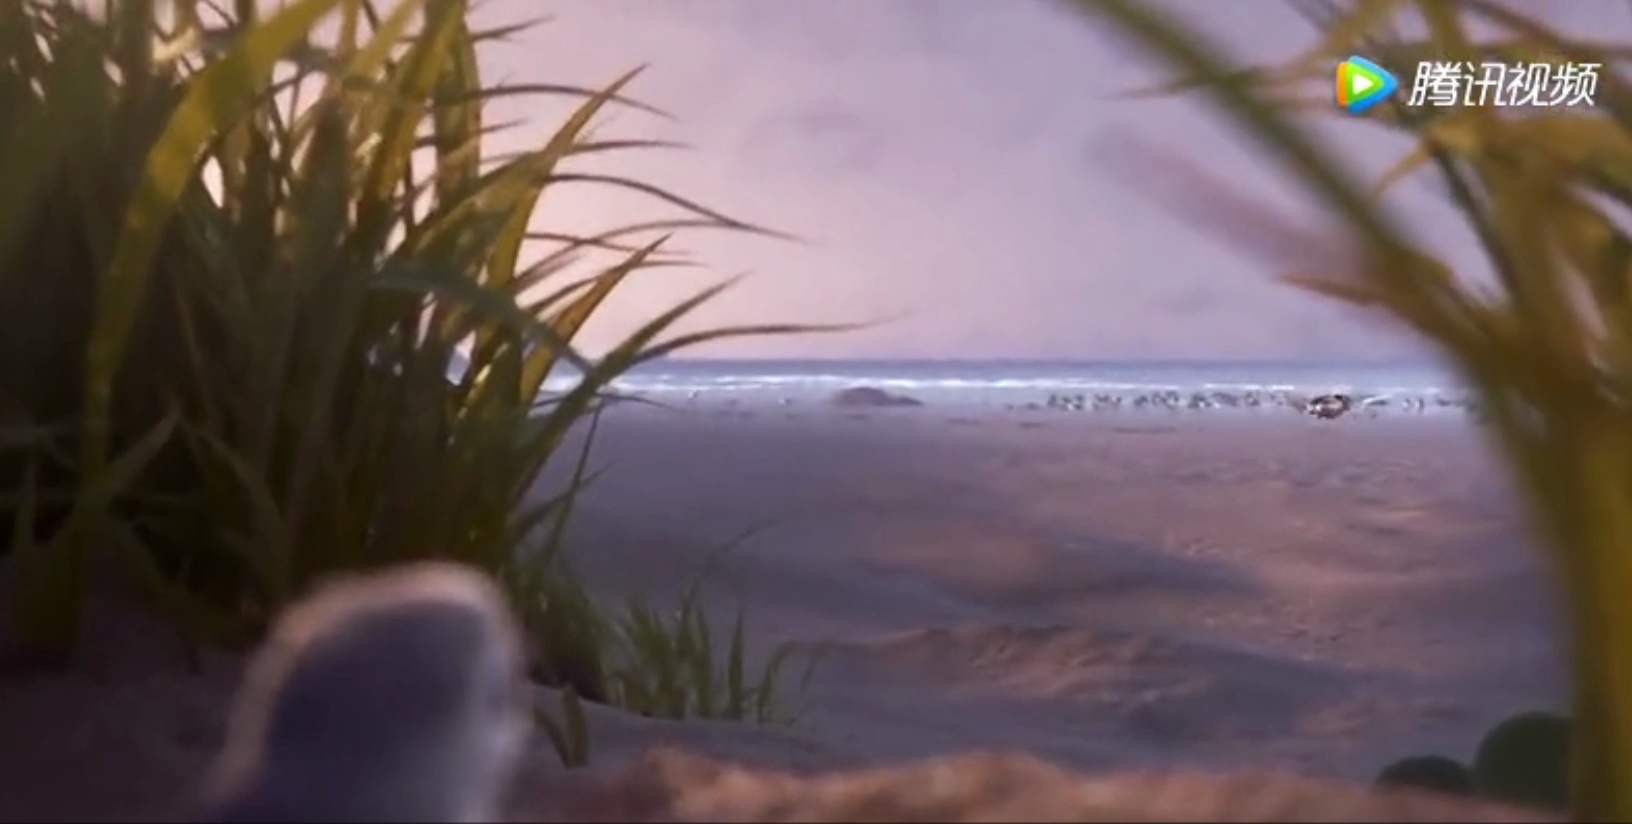

MoviePy - Done.
Moviepy - Writing video output_video_with_audiobirdy.mp4



Moviepy - Done !
Moviepy - video ready output_video_with_audiobirdy.mp4


ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr

0

In [10]:
import cv2
import os
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
from gtts import gTTS
from moviepy.editor import VideoFileClip, AudioFileClip

def extract_frames(video_path, frames_directory, num_descriptions):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError("Could not open the video file: Check the path or file format.")
    if not os.path.exists(frames_directory):
        os.makedirs(frames_directory)
    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    frame_id = 0
    video_duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / frame_rate
    frame_interval = max(int((video_duration * frame_rate) / num_descriptions),40)
    while True:
        success, frame = cap.read()
        if not success:
            break
        if frame_id % frame_interval == 0:
            timestamp = frame_id / frame_rate
            timestamp_formatted = f'{timestamp:.2f}'
            frame_filename = os.path.join(frames_directory, f'timestamp_{timestamp_formatted}.jpg')
            if frame is not None and not frame.size == 0:
                cv2.imwrite(frame_filename, frame)
        frame_id += 1
    cap.release()
    return frame_rate


##generate every four frames
def create_srt_file(descriptions, output_srt_path, frame_rate):
    with open(output_srt_path, 'w') as f:
        for i, description in enumerate(descriptions):
            start_time = (i) / frame_rate
            end_time = ((i + 1)) / frame_rate
            start_time_str = format_time(start_time)
            end_time_str = format_time(end_time)
            f.write(f"{i + 1}\n")
            f.write(f"{start_time_str} --> {end_time_str}\n")
            f.write(f"{description}\n\n")

def format_time(seconds):
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds = int(seconds % 60)
    milliseconds = int((seconds - int(seconds)) * 1000)
    return f"{hours:02}:{minutes:02}:{seconds:02},{milliseconds:03}"

def create_audio_from_descriptions(descriptions, text_transcribed, output_audio_path):
    full_descriptions = " ".join(descriptions)
    full_text = full_descriptions + text_transcribed
    summary_prompt = f"The following descriptions are for video frames, followed by transcribed text for the entire video. Paraphrase a bit to have coherence and connection between sentences, and be shorter. Do not exceed the total length of the original text ({len(full_descriptions)})!!:\n\n{full_text}"

    summary_message = llm.invoke(summary_prompt)
    tts = gTTS(text=summary_message.content, lang='en')
    tts.save(output_audio_path)


def merge_audio_with_video(video_path, audio_path, output_path):
    video_clip = VideoFileClip(video_path)
    audio_clip = AudioFileClip(audio_path)
    video_clip = video_clip.set_audio(audio_clip)
    video_clip.write_videofile(output_path, codec="libx264", audio_codec="aac")

# Example usage
video_name = "birdy"
video_path = "birdy.mov"
frames_directory = "my_frames"
video_clip = VideoFileClip(video_path)
video_duration = video_clip.duration
num_descriptions = int(video_duration // 5)
frame_rate = extract_frames(video_path, frames_directory, num_descriptions)

# Generate descriptions for all frames
frame_files = sorted([os.path.join(frames_directory, f) for f in os.listdir(frames_directory) if f.endswith('.jpg')])
descriptions = [get_image_information(frame) for frame in frame_files]

# Create SRT file
output_srt_path = "video_captions_" +video_name +".srt"
create_srt_file(descriptions, output_srt_path, frame_rate)

# Generate audio from descriptions
output_audio_path = "summary_audio"+video_name+".mp3"
create_audio_from_descriptions(descriptions, text_transcribed, output_audio_path)


# Merge audio with video
output_video_path = "output_video_with_audio"+video_name+".mp4"
merge_audio_with_video(video_path, output_audio_path, output_video_path)

# Merge the SRT file with the video using ffmpeg
os.system(f'ffmpeg -i {output_video_path} -vf "subtitles={output_srt_path}" output_video_with_captions.mp4')

---transcribe, if needed---